In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font_scale=1.3)


### Hellaswag

100%|██████████| 5000/5000 [00:03<00:00, 1627.10it/s]


target: 0, model_label: A, average_answer_score: 0.8837992911614247
target: 0, model_label: B, average_answer_score: 0.627664242974624
target: 0, model_label: C, average_answer_score: 0.6386434163145377
target: 0, model_label: D, average_answer_score: 0.6661377342720098
target: 1, model_label: A, average_answer_score: 0.41008426997798764
target: 1, model_label: B, average_answer_score: 0.9379678050733561
target: 1, model_label: C, average_answer_score: 0.5758943942311893
target: 1, model_label: D, average_answer_score: 0.5979259614028511
target: 2, model_label: A, average_answer_score: 0.4344864790451431
target: 2, model_label: B, average_answer_score: 0.5808480142328181
target: 2, model_label: C, average_answer_score: 0.9425891220711903
target: 2, model_label: D, average_answer_score: 0.6284196894932357
target: 3, model_label: A, average_answer_score: 0.37397488636911974
target: 3, model_label: B, average_answer_score: 0.5493961396116245
target: 3, model_label: C, average_answer_score

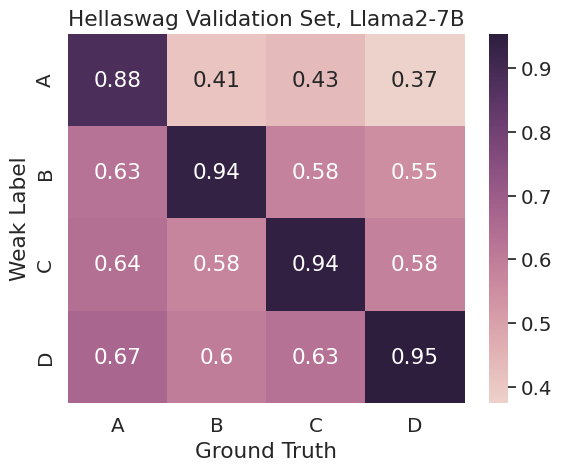

In [14]:
# before import this function, comment out the line "df_val = df_val.drop(columns=['ind','target','prompt','model_output','model_pred','entropy'])" in the function prepare_validation_set_hellaswag
from Hellaswag.our_method_reweighting import prepare_validation_set_hellaswag

hellaswag_val_df,_ = prepare_validation_set_hellaswag("LLAMA2-7B")  

hellaswag_val_df["model_label"] = hellaswag_val_df["model_output"].apply(lambda x: x.strip(" ").split(" ")[0].strip().strip("\n"))

avg_scores = []
for target in [0,1,2,3]:
    avg_scores_for_target = []
    for model_label in ["A","B","C","D"]:
        rows = hellaswag_val_df[(hellaswag_val_df["target"]==target)&(hellaswag_val_df["model_label"]==model_label)]
        average_answer_score = rows["answer_score"].mean()
        print(f"target: {target}, model_label: {model_label}, average_answer_score: {average_answer_score}")
        avg_scores_for_target.append(average_answer_score)
    avg_scores.append(avg_scores_for_target)
    
avg_scores = np.array(avg_scores).T

heatmap_hellaswag = sns.heatmap(avg_scores,
                                xticklabels=["A","B","C","D"],
                                yticklabels=["A","B","C","D"],
                                annot=True,
                                cmap=sns.cubehelix_palette(as_cmap=True)
)
heatmap_hellaswag.set(xlabel='Ground Truth', ylabel='Weak Label')
heatmap_hellaswag.set(title='Hellaswag Validation Set, Llama2-7B')
figure = heatmap_hellaswag.get_figure()

figure.savefig("figures/heatmap_reliability_score_hellaswag_LLAMA2-7B.png",bbox_inches='tight')

### MMLU

100%|██████████| 1474/1474 [00:00<00:00, 1592.50it/s]


target: A, model_label: A, average_answer_score: 0.7626969003102343
target: A, model_label: B, average_answer_score: 0.46350764559484364
target: A, model_label: C, average_answer_score: 0.4895982361321874
target: A, model_label: D, average_answer_score: 0.5213997102781757
target: B, model_label: A, average_answer_score: 0.48996101319795987
target: B, model_label: B, average_answer_score: 0.683361281121092
target: B, model_label: C, average_answer_score: 0.4944832587835564
target: B, model_label: D, average_answer_score: 0.5610927684502786
target: C, model_label: A, average_answer_score: 0.526684032992139
target: C, model_label: B, average_answer_score: 0.4446275186986488
target: C, model_label: C, average_answer_score: 0.6900234985217396
target: C, model_label: D, average_answer_score: 0.5189364518135402
target: D, model_label: A, average_answer_score: 0.5102445799541999
target: D, model_label: B, average_answer_score: 0.4574903222619018
target: D, model_label: C, average_answer_score:

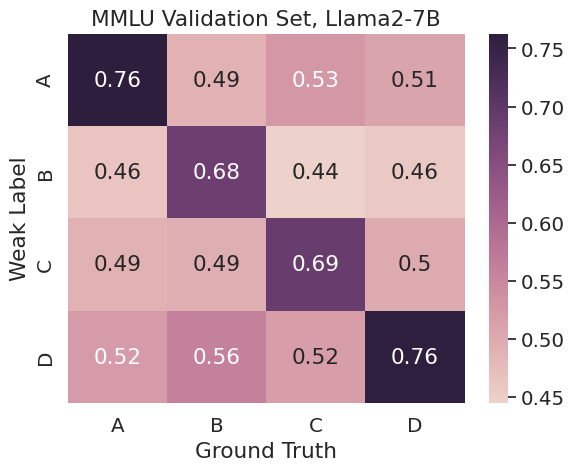

In [15]:
# before import this function, comment out the line "df_val = df_val.drop(columns=['subject','input','prompt','target','model_output','model_pred','entropy'])" in the function prepare_validation_set_MMLU
from mmlu.our_method_reweighting import prepare_validation_set_MMLU

mmlu_val_df = prepare_validation_set_MMLU("LLAMA2-7B")

mmlu_val_df["model_label"] =  mmlu_val_df["model_output"].apply(lambda x: x.strip(" ").split(" ")[0].strip().strip("\n"))

avg_scores = []
for target in ["A","B","C","D"]:
    avg_scores_for_target = []
    for model_label in ["A","B","C","D"]:
        rows = mmlu_val_df[(mmlu_val_df["target"]==target)&(mmlu_val_df["model_label"]==model_label)]
        average_answer_score = rows["answer_score"].mean()
        print(f"target: {target}, model_label: {model_label}, average_answer_score: {average_answer_score}")
        avg_scores_for_target.append(average_answer_score)
    avg_scores.append(avg_scores_for_target)
    
avg_scores = np.array(avg_scores).T

heatmap_mmlu  = sns.heatmap(avg_scores,
                                xticklabels=["A","B","C","D"],
                                yticklabels=["A","B","C","D"],
                                annot=True,
                                cmap=sns.cubehelix_palette(as_cmap=True)
)
heatmap_mmlu.set(xlabel='Ground Truth', ylabel='Weak Label')
heatmap_mmlu.set(title='MMLU Validation Set, Llama2-7B')
figure = heatmap_mmlu.get_figure()
figure.savefig("figures/heatmap_reliability_score_mmlu_LLAMA2-7B.png",bbox_inches='tight')

### ETHICS

100%|██████████| 6955/6955 [00:03<00:00, 2107.06it/s]


target: 0, model_label: 0, average_answer_score: 0.9265489979775694
target: 0, model_label: 1, average_answer_score: 0.8068027210884354
target: 1, model_label: 0, average_answer_score: 0.8531289910600255
target: 1, model_label: 1, average_answer_score: 0.8706095041322314


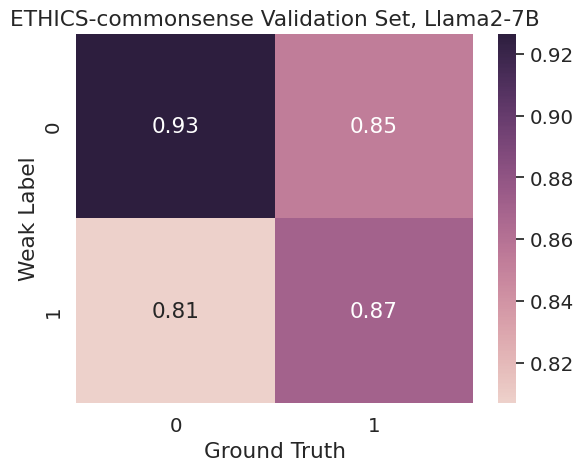

In [16]:
# before import this function, comment out the line "df_val = df_val.drop(columns=['input','is_short','label','prompt','model_output','model_pred','entropy'])" in the function prepare_validation_set_ETHICS
from ETHICS.commonsense.our_method_reweighting import prepare_validation_set_ETHICS

ethics_val_df = prepare_validation_set_ETHICS("LLAMA2-7B")


avg_scores = []
for target in [0,1]:
    avg_scores_for_target = []
    for model_label in [0,1]:
        rows = ethics_val_df[(ethics_val_df["label"]==target)&(ethics_val_df["model_pred"]==model_label)]
        average_answer_score = rows["answer_score"].mean()
        print(f"target: {target}, model_label: {model_label}, average_answer_score: {average_answer_score}")
        avg_scores_for_target.append(average_answer_score)
    avg_scores.append(avg_scores_for_target)
    
avg_scores = np.array(avg_scores).T

heatmap_ethics = sns.heatmap(avg_scores,
                                xticklabels=[0,1],
                                yticklabels=[0,1],
                                annot=True,
                                cmap=sns.cubehelix_palette(as_cmap=True)
)
heatmap_ethics.set(xlabel='Ground Truth', ylabel='Weak Label')
heatmap_ethics.set(title='ETHICS-commonsense Validation Set, Llama2-7B')
figure = heatmap_ethics.get_figure()
figure.savefig("figures/heatmap_reliability_score_ethics_LLAMA2-7B.png",bbox_inches='tight')

### GSM8K

100%|██████████| 3677/3677 [00:02<00:00, 1703.50it/s]


correct: 0.4385300307443574, incorrect: 0.2904287503980263


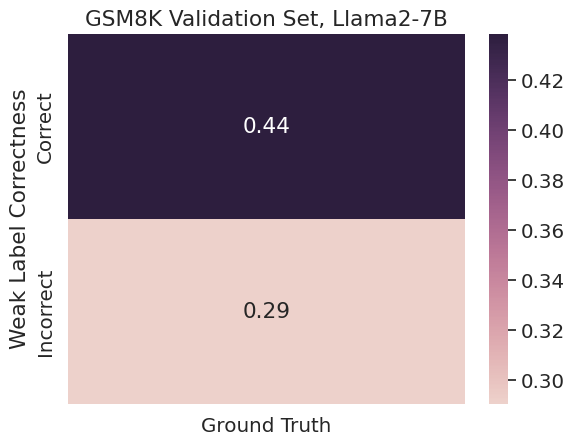

In [17]:
# before import this function, comment out the line "df_val = df_val.drop(columns=['original_question','original_answer','label','prompt','weak_label','model_pred', 'entropy'])" in the function prepare_validation_set_GSM8K
from GSM8K.our_method_reweighting import prepare_validation_set_GSM8K

gsm8k_val_df = prepare_validation_set_GSM8K("LLAMA2-7B")

avg_scores = []

correct = gsm8k_val_df[gsm8k_val_df["label"]==gsm8k_val_df["model_pred"]]
incorrect = gsm8k_val_df[gsm8k_val_df["label"]!=gsm8k_val_df["model_pred"]]

avg_scores.append(correct["answer_score"].mean())
avg_scores.append(incorrect["answer_score"].mean())
print(f"correct: {avg_scores[0]}, incorrect: {avg_scores[1]}")

heatmap_gsm8k = sns.heatmap(np.array([avg_scores]).T,
                            xticklabels=["Ground Truth"],
                            yticklabels=["Correct","Incorrect"],
                            annot=True,
                            cmap=sns.cubehelix_palette(as_cmap=True)
)       

heatmap_gsm8k.set(ylabel='Weak Label Correctness')
heatmap_gsm8k.set(title='GSM8K Validation Set, Llama2-7B')
figure = heatmap_gsm8k.get_figure()
figure.savefig("figures/heatmap_reliability_score_gsm8k_LLAMA2-7B.png",bbox_inches='tight')